In [1]:
  
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

#Description

# **What does it do?** This scrapes the each headlines news for the desired stock on the following website: finviz, marketplace, google news, and applies Vader to find an overall sentiment of the given day based on all the headlines given by the website - shows a graph 

# **Conclusion** In this test, I found that different website will not have the exact same news: news might be missing but with three different websites we can overall assess a feeling of what the market might feel. We can also assess if the website may have biases

For example: 
***On MarketWatch***, there is no Amazon or NFLX for Feb 14, 2021

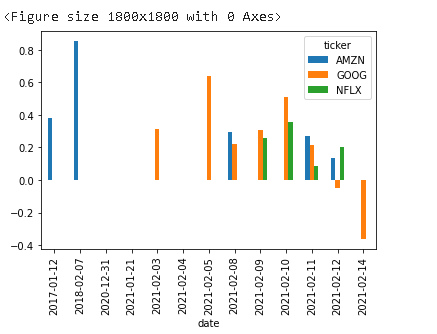

**Whereas on FinViz**, we have all three

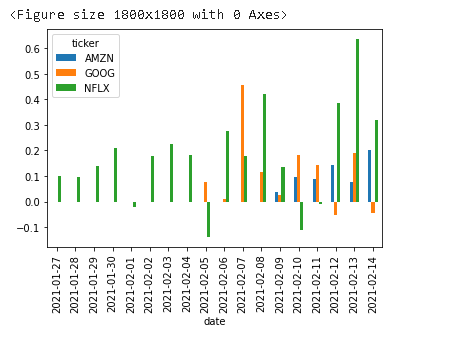

As per shown these graph are dated as of Feb 14, 2021

#**Needed Improvement:** Some websites we need to do autoscrolling to view older news

# Sentiment Analysis on FinViz

In [2]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'GOOG','NFLX']

In [3]:
news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table


In [4]:
parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

# parsed_data  
# Example
#  ['NFLX',
#   'Dec-23-20',
#   '12:43PM\xa0\xa0',
#   'The Show Must Go On, But Not For AMC Stock'],

<Figure size 1800x1800 with 0 Axes>

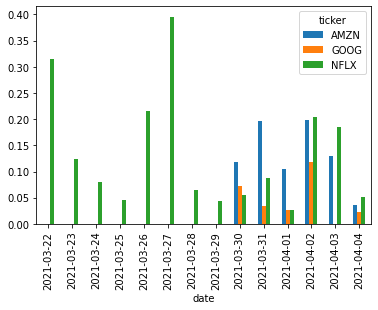

In [5]:
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

plt.figure(figsize=(25,25))
mean_df = df.groupby(['date', 'ticker']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()



# Sentiment Analysis on MarketWatch

In [6]:
url_marketplace = 'https://www.marketwatch.com/investing/stock/'

news_tables = {}
for ticker in tickers:
    url = url_marketplace + ticker
    print(url)

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(class_='collection__elements j-scrollElement')
    
    news_tables[ticker] = news_table


https://www.marketwatch.com/investing/stock/AMZN
https://www.marketwatch.com/investing/stock/GOOG
https://www.marketwatch.com/investing/stock/NFLX


In [7]:
parsed_data = []
for ticker, news_table in news_tables.items():
    for row in news_table.findAll(class_="element element--article "):
      title= row.div.h3.text.strip()
      timesteps= row.div.div.span.text.split()
      date = timesteps[0] + timesteps[1] + timesteps[2]
      parsed_data.append([ticker, date, title])
#display data
#parsed_data
#Example
# [['AMZN',
#   'Jan.7,2021',
#   'Amazon and Tesla Have Been Great Long-Term Stocks. This Growth Fund Manager Explains Why—and How to Spot Others Like Them.'],

<Figure size 1800x1800 with 0 Axes>

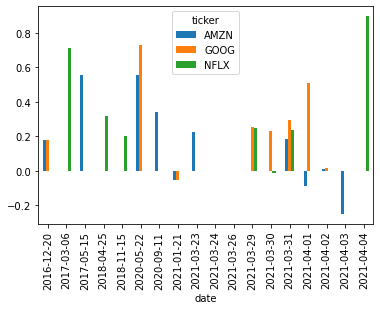

In [8]:
df2 = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'title'])

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df2['compound'] = df2['title'].apply(f)
df2['date'] = pd.to_datetime(df2.date).dt.date

plt.figure(figsize=(25,25))
mean_df = df2.groupby(['date', 'ticker']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()



# Sentiment Analysis on Google News

In [9]:
url_google_doc = 'https://news.google.com/search?q='
url_google_end = '&hl=en-CA&gl=CA&ceid=CA%3Aen'

news_tables = {}
for ticker in tickers:
    url = url_google_doc + ticker + url_google_end
    print(url)

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(class_='lBwEZb BL5WZb xP6mwf')
    
    news_tables[ticker] = news_table
    

https://news.google.com/search?q=AMZN&hl=en-CA&gl=CA&ceid=CA%3Aen
https://news.google.com/search?q=GOOG&hl=en-CA&gl=CA&ceid=CA%3Aen
https://news.google.com/search?q=NFLX&hl=en-CA&gl=CA&ceid=CA%3Aen


In [10]:
parsed_data_google=[]

for ticker, news_table in news_tables.items():
  for row in news_table.findAll(class_="NiLAwe y6IFtc R7GTQ keNKEd j7vNaf nID9nc"):

    title=row.h3.a.text.strip()
    # print(title)

    date = row.time['datetime']
    date = (date[:10])

    parsed_data_google.append([ticker,date,title])

#Display data
# parsed_data_google
#Exmaple
# ['NFLX',
#   '2020-08-27',
#   'Netflix (NFLX) Back in Rally Mode After Brief Correction'],

In [11]:
vader.polarity_scores('Suncor to record impairment charge on White Rose assets')

{'compound': 0.1779, 'neg': 0.0, 'neu': 0.825, 'pos': 0.175}

In [12]:
from datetime import date, timedelta
fifteendaysago = date.today() - timedelta(15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<Figure size 1440x1440 with 0 Axes>

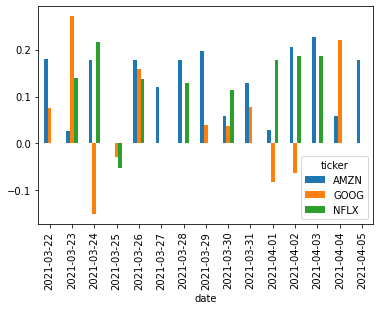

In [14]:
df3 = pd.DataFrame(parsed_data_google, columns=['ticker', 'date', 'title'])
df3_15days=df3[df3['date']>=str(fifteendaysago)]
vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df3_15days['compound'] = df3_15days['title'].apply(f)
df3_15days['date'] = pd.to_datetime(df3.date).dt.date

plt.figure(figsize=(20,20))
mean_df = df3_15days.groupby(['date', 'ticker']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()


In [ ]:
df3_fifteendaysago=df3[df3['date']>=str(fifteendaysago)]

In [ ]:
df3_fifteendaysago